# 2022 Data Challenge Dashboard    
1/14/2023
### Overview

For the 2022 SECOORA Data Challenge we investigated weather events in historical wave spectrum datasets from 2006-2022 in the South Atlantic Bight (SAB). This dashboard allows users to view buoy observations and model data from significant events at four moorings.
<br>
<br>

Moorings include:
<br>

NDBC 41025 
<br>
   NDBC 41013 
<br>
   NDBC 41004 
<br>
    NDBC 41009 

Model outputs are from a 25 year ROMS reanalysis ran by the Ocean Observing and Modeling Group (OOMG) at NC State.

A description of the project is availible at : https://github.com/twhesford/final


### Using the dashboard

1. Install the dependencies by uncommenting and running the cell below

In [1]:
import sys
# !{sys.executable} -m pip install numpy panel bs4 

2.  Interact with the dashboard by running this notebook OR by navigating to the current working directory in     a terminal and run:
<br>

`py -m panel serve hvplot_interactive.ipynb`

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
pn.extension()
from bs4 import BeautifulSoup
import requests

import pybuoy as pb

In [2]:
META = pb.get_meta()
stations,depths,events,names,mod_coords,blat,blon,ec = META

In [3]:
dtype = pn.widgets.Select(name='Data Field',value = 'Seafloor Stress (pa)',options = ['Seafloor Stress (pa)',
                                                                                      'Wind Dir. (deg)',
                                                                                      'Wind Speed (m/s)',
                                                                                      'Sig. Wave Height (m)',
                                                                                      'Peak Period (s)',
                                                                                      'Mean Period (s)',
                                                                                      'Mean Wave Dir. (deg)',
                                                                                      'Atm. Pressure (hPa)',
                                                                                      'Air Temp (c)',
                                                                                      'SST (c)'])

mod_dtype = pn.widgets.Select(name='Model Field',value = 'Seafloor Current Spd. (m/s)',options = ['Seafloor Current Spd. (m/s)',
                                                                                                 'SST (c)'])

event_bar = pn.widgets.Select(name='Events',value=names[1],options=list(names),disabled_options=list(map(str,stations)))
time_bar = pn.widgets.IntSlider(name='Event Duration (%)',start=0,end=99,step=1,value=1)

top = pn.Row(event_bar,dtype)
bot  = pn.Row(time_bar,mod_dtype)
control_pane = pn.Column(top,bot)

In [4]:
a=pn.bind(pb.plot,event=event_bar,dtype=dtype,mdtype=mod_dtype,time=time_bar.param.value_throttled,meta=META)

C:\Users\twhes\Projects\final\pybuoy\make_hr.py:35: RuntimeWarning: Mean of empty slice
  out[out_idx,1:] =  np.nanmean(data[idx:idx+step,:],axis=0)
C:\Users\twhes\Projects\final\pybuoy\madsen94.py:32: RuntimeWarning: invalid value encountered in divide
  T_br = 1/(np.nansum(f*df*spec,axis=ax)/np.nansum(df*spec,axis=ax))


Column
    [0] Column
        [0] Row
            [0] Select(disabled_options=['41013', '41009', ...], name='Events', options=['41013', '1a. Hur. Sandy'...], value='1a. Hur. Sandy')
            [1] Select(name='Data Field', options=['Seafloor Stress (pa)', ...], value='Seafloor Stress (pa)')
        [1] Row
            [0] IntSlider(end=99, name='Event Duration (%)', value=1)
            [1] Select(name='Model Field', options=['Seafloor Current Spd. (m...], value='Seafloor Current S...)
    [1] ParamFunction(function, _pane=Matplotlib, defer_load=False)
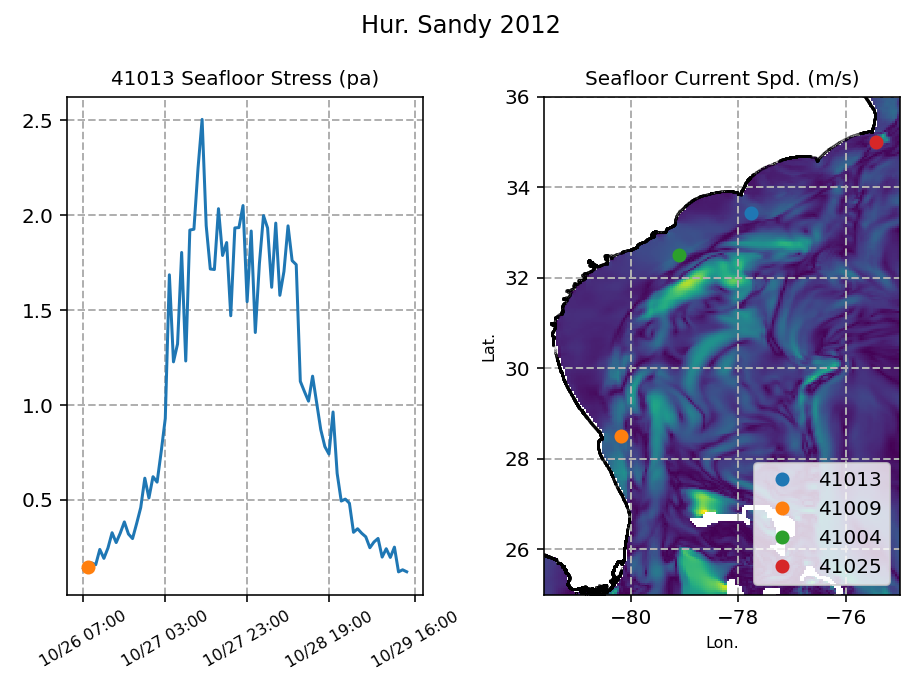

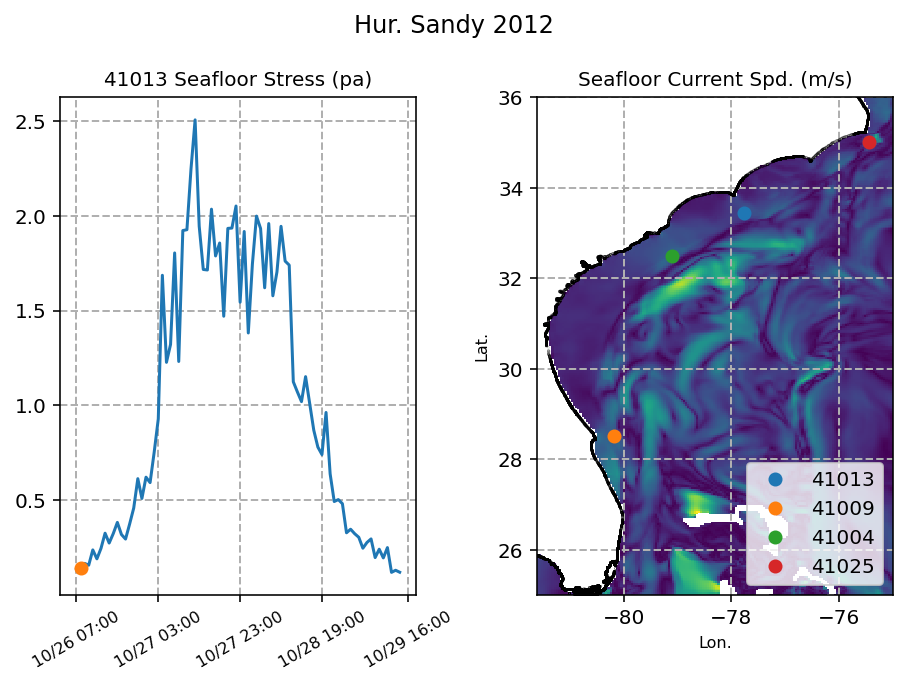

In [5]:
pn.Column(control_pane,a).servable()